<h2>Code-Example: Contrasts and Multiple Comparisons</h2>
<font size="3" face="Verdana">
<br>    
<p style="text-align:justify">The following code first implements an ANOVA on R's built-in "ChickWeight" dataset. It then performs contrast analysis and mutiple comparisons on it.</p>
    
<p style="text-align:justify">To run the example, click on each of the following code-blocks and press the "run"-button in the menu on top of this page.</p>

<p style="text-align:justify">Follow the comments in each code-block to understand the commands executed in each step.</p>

<p style="text-align:justify">You can also import any custom or R's built-in dataset and use it to perform contrast analysis and multiple comparisons on the required variables. While doing this, make sure to choose the parameters appropriately, e.g. here we shall find the effects of four different diets (independent variables) on the weight of the chickens (dependent variable).</p>

</font>

In [22]:
library(mvtnorm)
library(survival)
library(MASS)
library(TH.data, warn.conflicts=FALSE)
library(multcomp)
library(DescTools)

In [23]:
# We shall use the ChickWeight database for our analysis.
data(ChickWeight)
summary(ChickWeight)

     weight           Time           Chick     Diet   
 Min.   : 35.0   Min.   : 0.00   13     : 12   1:220  
 1st Qu.: 63.0   1st Qu.: 4.00   9      : 12   2:120  
 Median :103.0   Median :10.00   20     : 12   3:120  
 Mean   :121.8   Mean   :10.72   10     : 12   4:118  
 3rd Qu.:163.8   3rd Qu.:16.00   17     : 12          
 Max.   :373.0   Max.   :21.00   19     : 12          
                                 (Other):506          

In [24]:
# We will evaluate the effects of different diets on the weight of chickens. 
# Let us check the number of diets (treatments) that we have.
levels(ChickWeight$Diet)

[1] "1" "2" "3" "4"

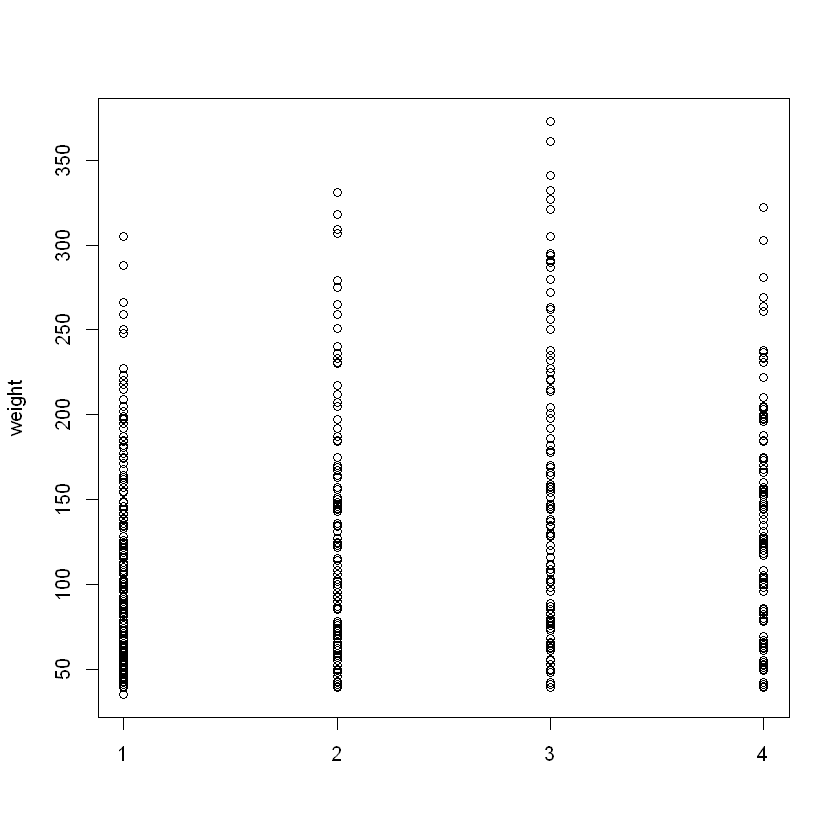

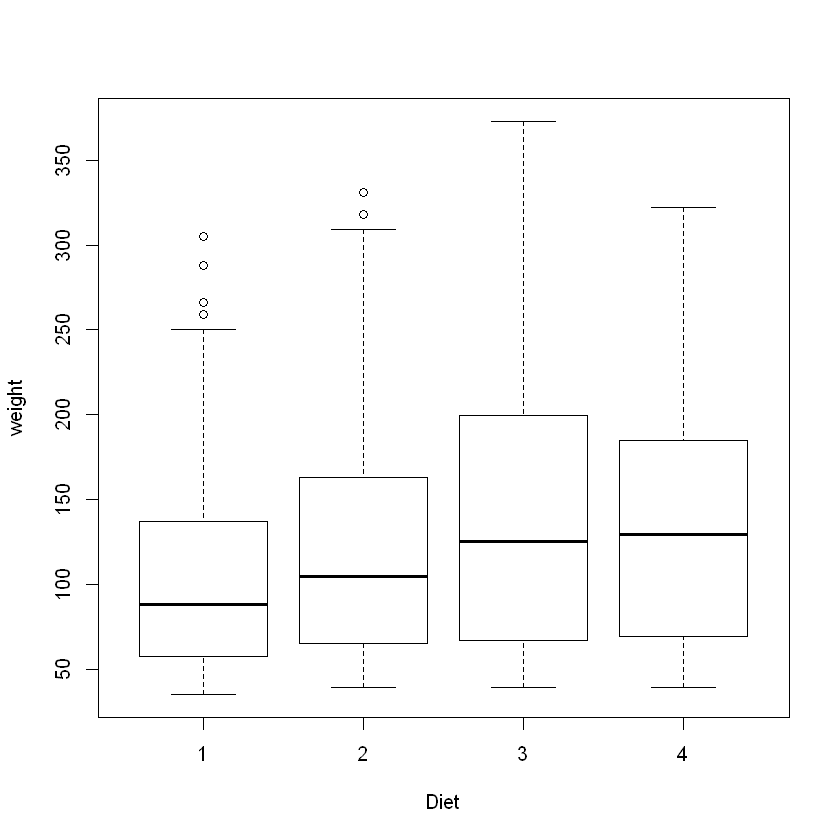

In [25]:
# It is a good practice to quickly visualize the data to get an overview.
stripchart(weight~Diet, vertical=TRUE, pch=1, data=ChickWeight)
boxplot(weight~Diet, data=ChickWeight)

In [26]:
# Let us use ANOVA to find if the diets have a significant difference on weights of the chickens. 
# We shall consider the level of confidence, alpha=0.05 throughout this code example.

fit <- aov(weight~Diet, data=ChickWeight)
summary(fit)

             Df  Sum Sq Mean Sq F value   Pr(>F)    
Diet          3  155863   51954   10.81 6.43e-07 ***
Residuals   574 2758693    4806                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [27]:
# From the results of the previous step, we see that the treatments have a significant difference.
# Let us set 5 contrasts as given in the R command to compare the corresponding effects,
# e.g. the first contrast (1,0,-1,0) compares the effects of diet 1 vs diet 3.

K <- rbind(c(1,0,-1,0), c(0,0,1,-1), c(0,1,-1,0), c(0,1,0,-1), c(1/2,0,-1,1/2))
K

[,1] [,2] [,3] [,4]
[1,] 1.0  0    -1    0.0
[2,] 0.0  0     1   -1.0
[3,] 0.0  1    -1    0.0
[4,] 0.0  1     0   -1.0
[5,] 0.5  0    -1    0.5

In [28]:
# We will now fit the contrasts using the glht method in R.
# It allows us to perform general linear hypothesis testing for contrasts and multiple comparisons.
# In the results below each row shows the estimations for respective contrasts.
# 1==0 represents the first contrast c(1,0,-1,0) - comparison between diet 1 vs diet 3.
# 5==0 represents the fifth contrast c(1/2,0,-1,1/2) - comparison between average effect of diet 1 and diet 4 vs diet 3.
# We have significant differences wherever we have one or more stars.

fit.contrasts <- glht(fit, linfct = mcp(Diet=K))
summary(fit.contrasts)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: aov(formula = weight ~ Diet, data = ChickWeight)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)    
1 == 0  -40.305      7.867  -5.123  < 0.001 ***
2 == 0    7.687      8.988   0.855  0.76678    
3 == 0  -20.333      8.950  -2.272  0.07958 .  
4 == 0  -12.646      8.988  -1.407  0.41309    
5 == 0  -23.996      7.463  -3.215  0.00535 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


In [29]:
# From the above results we can draw the following conclusions:
# 1. There is a significant difference in diet 1 vs diet 3 on weights of the chickens.
# 2. There is a significant difference in average effect of diet 1 and diet 4 vs diet 3 on weights of the chickens.
# 3. There is a significant difference in diet 2 vs diet 3 on weights of the chickens, but at alpha=0.01.


In [30]:
# Let us now find which polynomial fit is the best for our data using polynomial contrasts.
# This analysis shows a highly significant linear effect.

PolynomialContrasts <- cbind(c(-3,-1,1,3),c(1,-1,-1,1),c(-1,3,-3,1))
contrasts(ChickWeight$Diet) <- PolynomialContrasts
fit.poly <- aov(weight~Diet, data=ChickWeight)
summary.aov(fit.poly, split=list(Diet=list("Linear"=1, "Quadratic"=2, "Cubic"=3)))


                   Df  Sum Sq Mean Sq F value   Pr(>F)    
Diet                3  155863   51954  10.810 6.43e-07 ***
  Diet: Linear      1  126333  126333  26.286 4.03e-07 ***
  Diet: Quadratic   1   24588   24588   5.116   0.0241 *  
  Diet: Cubic       1    4942    4942   1.028   0.3110    
Residuals         574 2758693    4806                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [31]:
# Let us now use Bonferroni method of multiple comparison using the ANOVA fit of the contrasts.
# Again, we see significant differences for contrasts 1 and 5.

summary(fit.contrasts, test=adjusted("bonferroni"))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: aov(formula = weight ~ Diet, data = ChickWeight)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)    
1 == 0  -40.305      7.867  -5.123 2.06e-06 ***
2 == 0    7.687      8.988   0.855  1.00000    
3 == 0  -20.333      8.950  -2.272  0.11731    
4 == 0  -12.646      8.988  -1.407  0.79980    
5 == 0  -23.996      7.463  -3.215  0.00688 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- bonferroni method)


In [32]:
# You can compare the results from the bonferroni method with the results from the glht test in code block 7.
# You will observe that the p-values have been adjusted as per the bonferroni method.


In [33]:
# We will now perform a Scheffe test for a pairwise comparison of means.
# The results tell us that there is a significant difference between diet 1 vs diet 3 and diet 1 vs 4.

ScheffeTest(fit)


  Posthoc multiple comparisons of means: Scheffe Test 
    95% family-wise confidence level

$Diet
         diff     lwr.ci   upr.ci    pval    
2-1 19.971212  -2.087494 42.02992 0.09314 .  
3-1 40.304545  18.245839 62.36325 1.1e-05 ***
4-1 32.617257  10.437921 54.79659 0.00079 ***
3-2 20.333333  -4.760495 45.42716 0.16163    
4-2 12.646045 -12.553888 37.84598 0.57698    
4-3 -7.687288 -32.887221 17.51265 0.86572    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [34]:
# Lastly, we perform the Tukey test for pairwise comparison of means.
# This yields similar results as that of the Scheffe test for pairwise comparisons.

fit.tukey <- glht(fit, linfct=mcp(Diet="Tukey"))
summary(fit.tukey)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = weight ~ Diet, data = ChickWeight)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)    
2 - 1 == 0   19.971      7.867   2.538   0.0548 .  
3 - 1 == 0   40.305      7.867   5.123   <0.001 ***
4 - 1 == 0   32.617      7.910   4.123   <0.001 ***
3 - 2 == 0   20.333      8.950   2.272   0.1049    
4 - 2 == 0   12.646      8.988   1.407   0.4934    
4 - 3 == 0   -7.687      8.988  -0.855   0.8267    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


In [19]:
# It is intuitive to map these results with the box plots in the initial step and visualize the difference.